## WWW Usage Time Series

Dataset from kaggle : https://www.kaggle.com/datasets/ukveteran/www-usage

In [1]:
# import library
import pandas as pd
from pandas import datetime
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# ignore warnings
import warnings
warnings.filterwarnings("ignore")

# statsmodels seasonal_decompose
from statsmodels.tsa.seasonal import seasonal_decompose

C:\Users\Zikri\AppData\Local\Temp\ipykernel_12968\3670467468.py:3: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime


In [2]:
# read datasets

cols = ['WWWusage']
df = pd.read_csv('WWWusage.csv', index_col = 'time')
df = df[cols]
df.head()

,WWWusage
time,
1,88
2,84
3,85
4,85
5,84


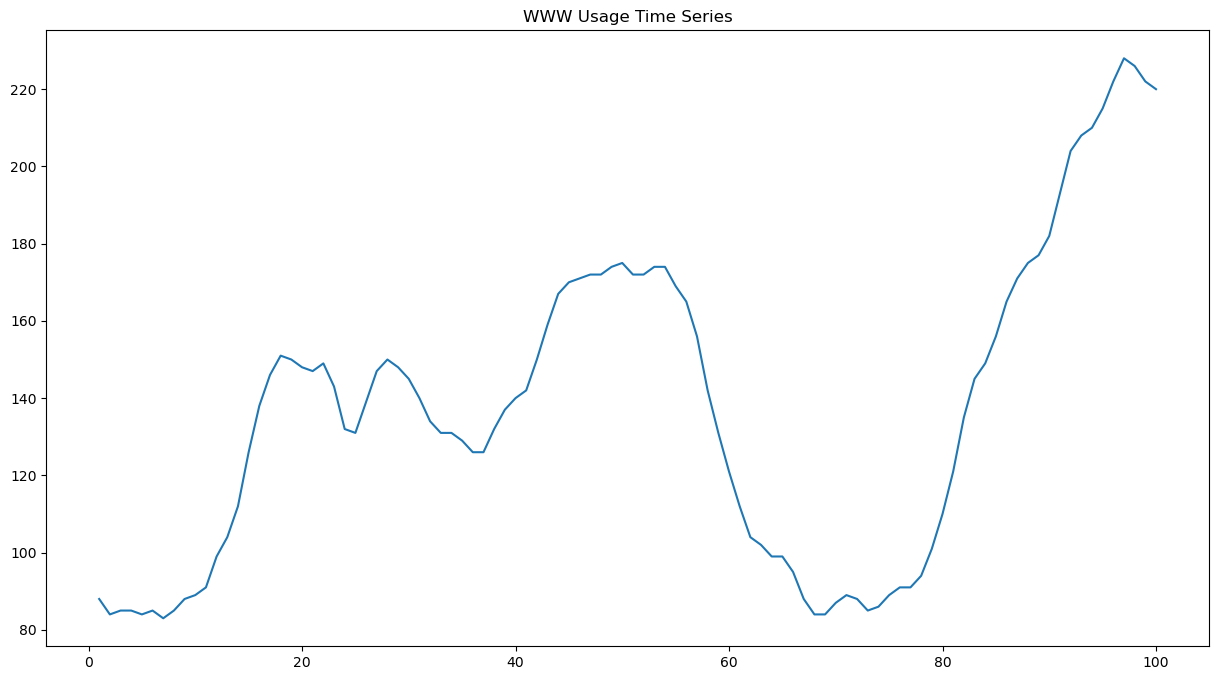

In [3]:
# plot the dataset graph
# the dataset has trend and seasonal change
plt.figure(figsize = (15,8))
plt.title('WWW Usage Time Series')
plt.plot(df)

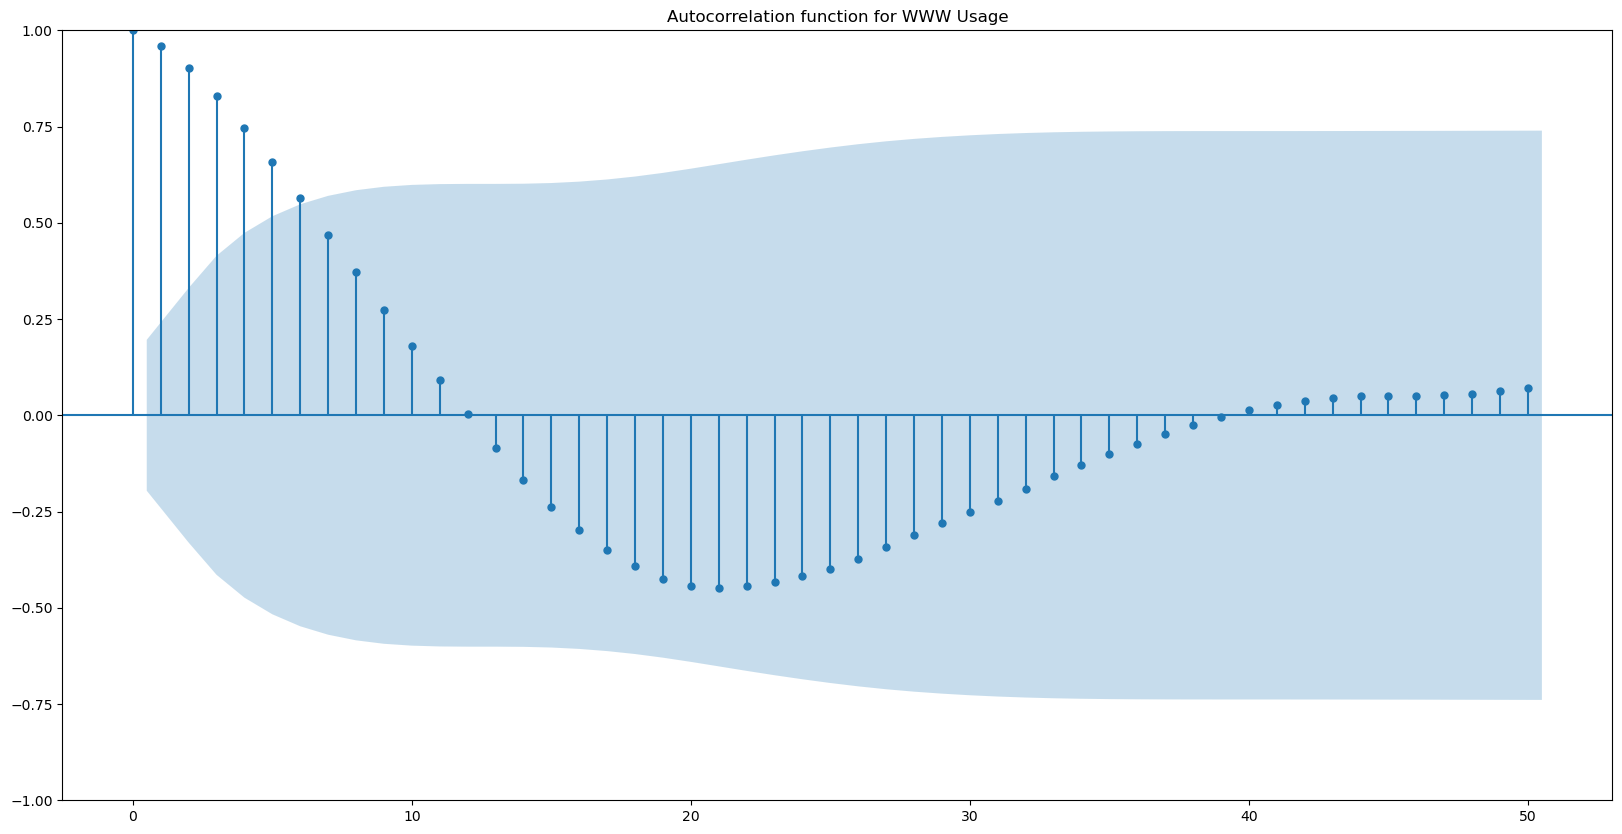

In [4]:
# statsmodels Time series Analysis plot: Autocorrelation plot
from statsmodels.graphics.tsaplots import plot_acf

plt.rc("figure", figsize=(20,10))
plot_acf(df, lags = 50, title='Autocorrelation function for WWW Usage')
plt.show()
#data: your time series
#lags: number of 'periods' you will like to investigate 

In [5]:
# Augmented Dickey-Fuller Test 
from statsmodels.tsa.stattools import adfuller

adftest = adfuller(df, autolag='AIC', regression='ct')
print("ADF Test Results")
print("Null Hypothesis: The series has a unit root (non-stationary)")
print("ADF-Statistic:", adftest[0])
print("P-Value:", adftest[1])
print("Number of lags:", adftest[2])
print("Number of observations:", adftest[3])
print("Critical Values:", adftest[4])
print("Note: If P-Value is smaller than 0.05, we reject the null hypothesis and the series is stationary")

ADF Test Results
Null Hypothesis: The series has a unit root (non-stationary)
ADF-Statistic: -2.6427477191487605
P-Value: 0.2606135793306707
Number of lags: 3
Number of observations: 96
Critical Values: {'1%': -4.056309393220125, '5%': -3.4572550874385124, '10%': -3.1544345187717013}
Note: If P-Value is smaller than 0.05, we reject the null hypothesis and the series is stationary


#### Differencing Step

- Determine the d value

We need to determine the order of differencing “d.” Let’s first check the autocorrelation plot.\
Clearly, the data is not ideal for the Python ARIMA model to directly start autoregressive training. So let’s see how the differencing segment of ARIMA model Python makes the data stationary.

- First-order differencing shakes up autocorrelation considerably. We can also try 2nd order differencing to enhance the stationary nature.
- If collectively the autocorrelations, or the data point of each lag (in the horizontal axis), are positive for several consecutive lags, more differencing might be needed. Conversely, if more data points are negative, the series is over-differenced.

#### The Augmented Dickey-Fuller test

However, a more mathematical test can be employed to determine which order is best for the data in question. The Augmented Dickey-Fuller test is one such measure that statsmodel readily provides. 

- The ADF test aims to reject the null hypothesis that the given time-series data is non-stationary. 
- It calculates the p-value and compares it with a threshold value or significance level of 0.05. 
- If the p-value is less than this level, then the data is stationary; else, the differencing order is incremented by one.

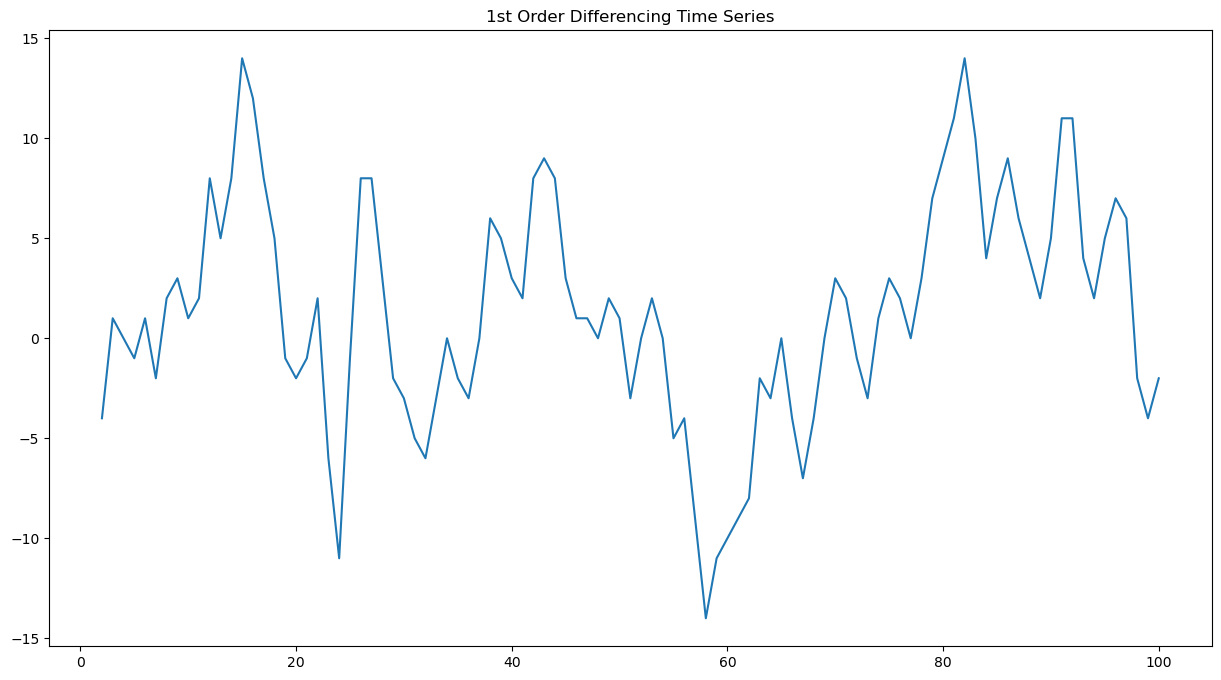

In [6]:
# diferencing method
# differencing for 1 period

df['df_first_order_diff'] = df['WWWusage'].diff()

# plot the dataset graph

plt.figure(figsize = (15,8))
plt.title('1st Order Differencing Time Series')
plt.plot(df['df_first_order_diff'] )

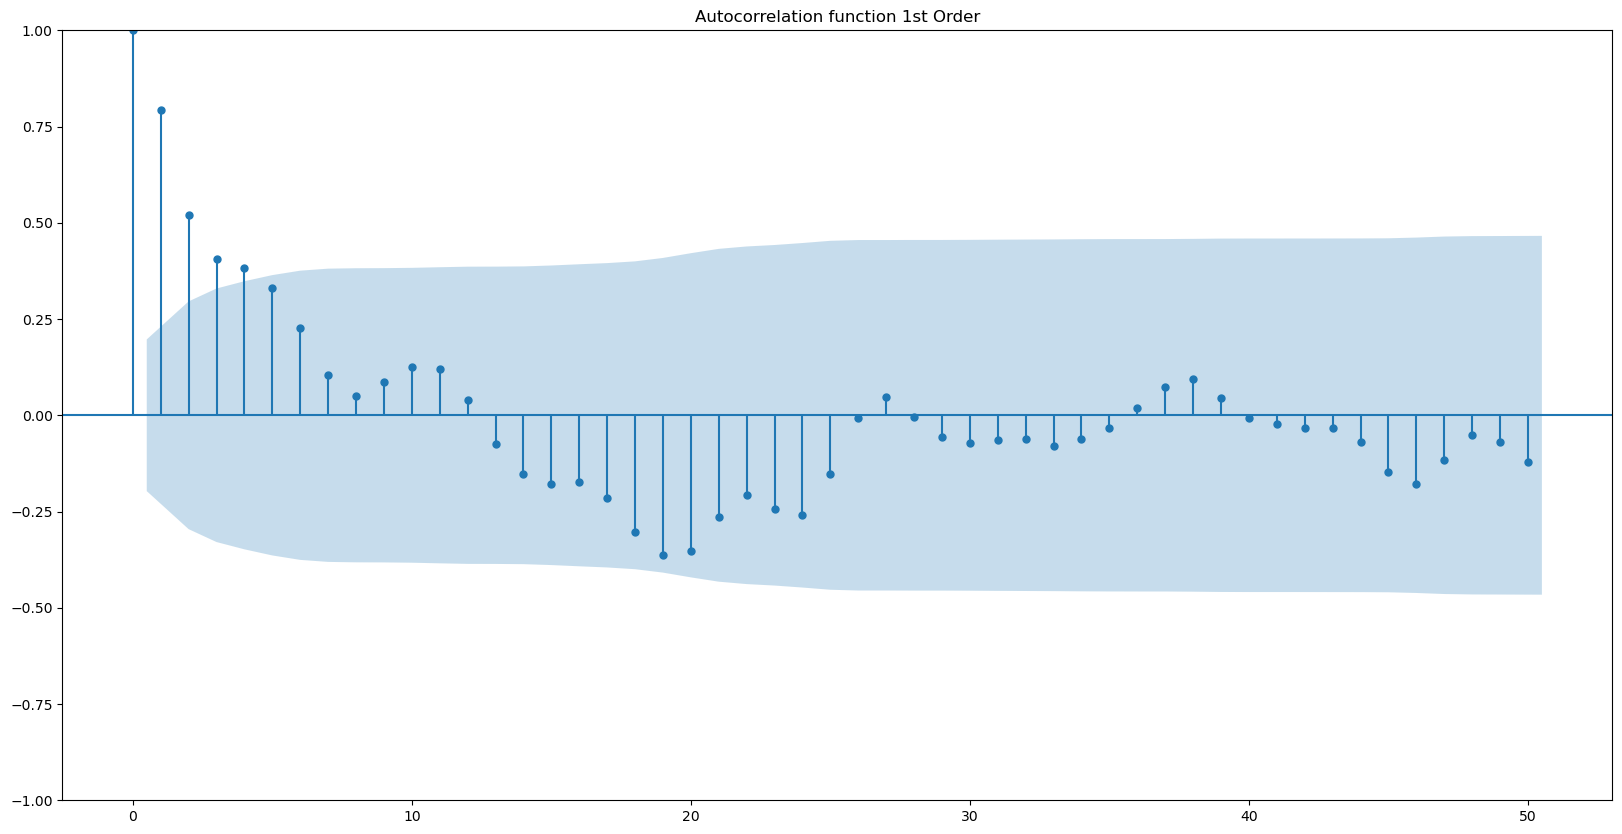

In [7]:
# statsmodels Time series Analysis plot: Autocorrelation plot
from statsmodels.graphics.tsaplots import plot_acf

plt.rc("figure", figsize=(20,10))
plot_acf(df['df_first_order_diff'].dropna(), lags = 50, title='Autocorrelation function 1st Order')
plt.show()
#data: your time series
#lags: number of 'periods' you will like to investigate 

In [8]:
# Augmented Dickey-Fuller Test 
# AIC : Akaike's Information Criteria

from statsmodels.tsa.stattools import adfuller

adftest = adfuller(df['df_first_order_diff'].dropna(), autolag='AIC', regression='ct')
print("ADF Test Results")
print("Null Hypothesis: The series has a unit root (non-stationary)")
print("ADF-Statistic:", adftest[0])
print("P-Value:", adftest[1])
print("Number of lags:", adftest[2])
print("Number of observations:", adftest[3])
print("Critical Values:", adftest[4])
print("Note: If P-Value is smaller than 0.05, we reject the null hypothesis and the series is stationary")

ADF Test Results
Null Hypothesis: The series has a unit root (non-stationary)
ADF-Statistic: -2.6766442670982666
P-Value: 0.245907491210491
Number of lags: 2
Number of observations: 96
Critical Values: {'1%': -4.056309393220125, '5%': -3.4572550874385124, '10%': -3.1544345187717013}
Note: If P-Value is smaller than 0.05, we reject the null hypothesis and the series is stationary


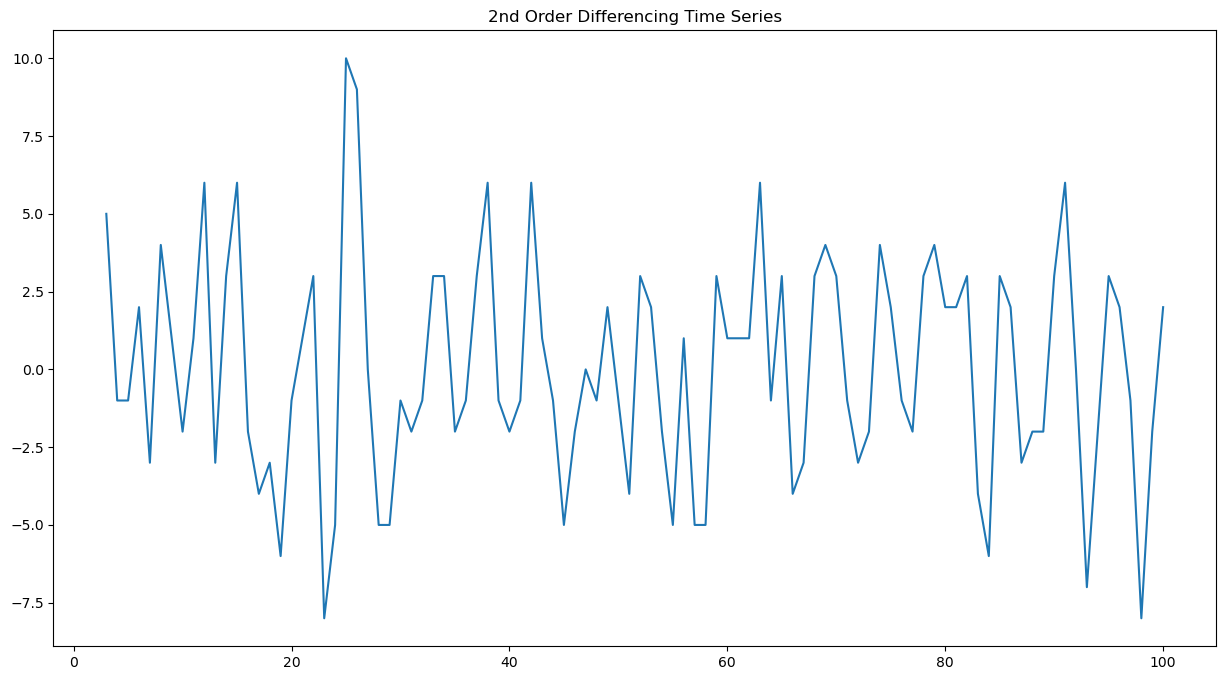

In [9]:
#the data is not ideal for the Python ARIMA model to directly start autoregressive training. 
#So let’s see how the differencing segment of ARIMA model Python makes the data stationary.

# diferencing method
# differencing for 2nd period

df['df_second_order_diff'] = df['df_first_order_diff'].diff()

# plot the dataset graph

plt.figure(figsize = (15,8))
plt.title('2nd Order Differencing Time Series')
plt.plot(df['df_second_order_diff'] )

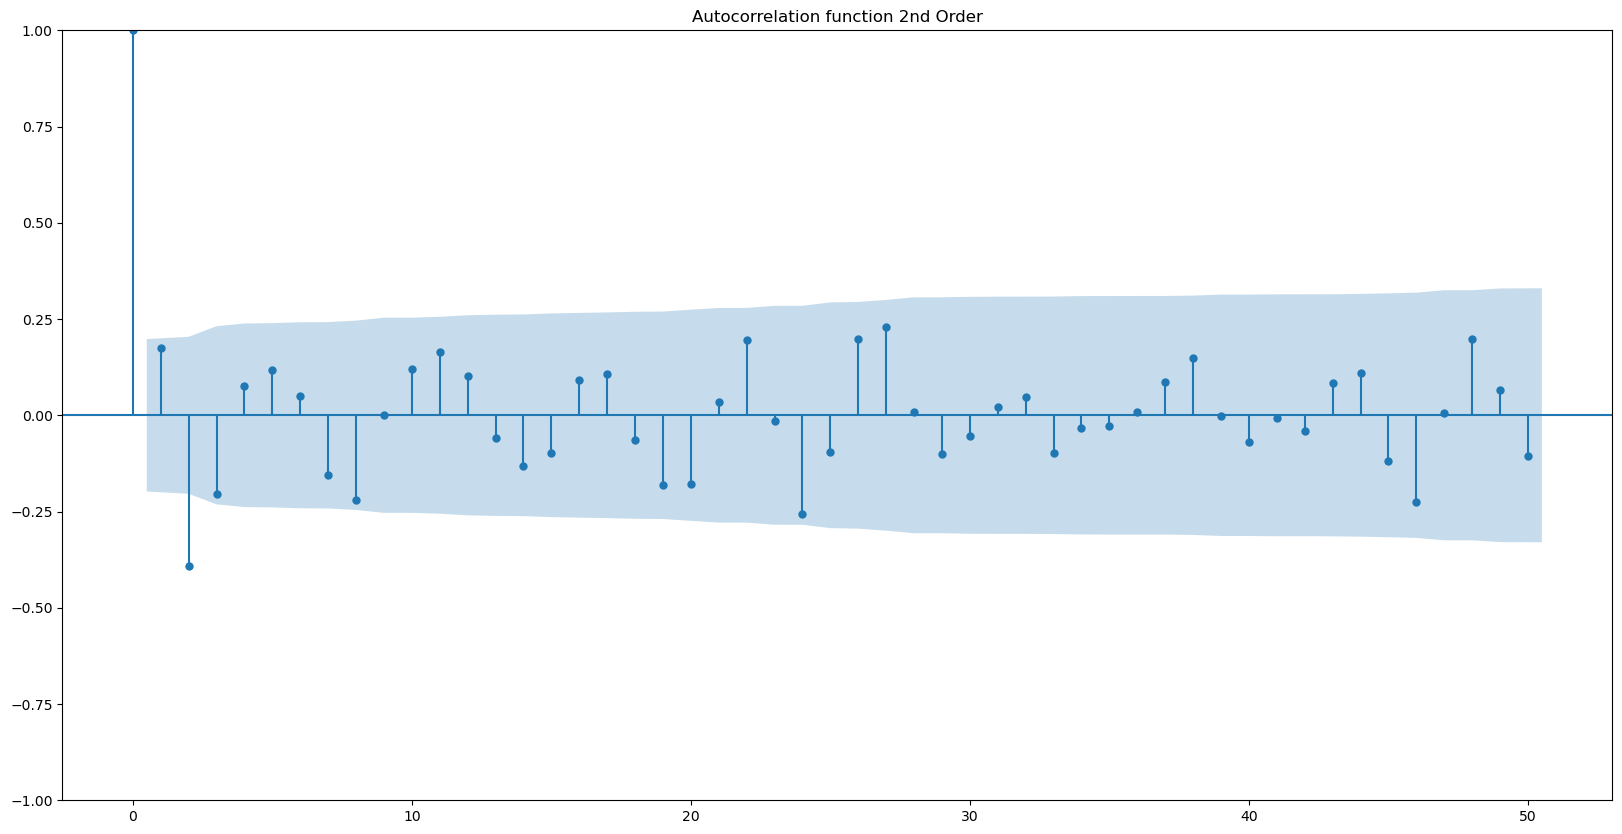

In [10]:
# statsmodels Time series Analysis plot: Autocorrelation plot
from statsmodels.graphics.tsaplots import plot_acf

plt.rc("figure", figsize=(20,10))
plot_acf(df['df_second_order_diff'].dropna(), lags = 50, title='Autocorrelation function 2nd Order')
plt.show()
#data: your time series
#lags: number of 'periods' you will like to investigate 

In [11]:
# Augmented Dickey-Fuller Test 
from statsmodels.tsa.stattools import adfuller

adftest = adfuller(df['df_second_order_diff'].dropna(), autolag='AIC', regression='ct')
print("ADF Test Results")
print("Null Hypothesis: The series has a unit root (non-stationary)")
print("ADF-Statistic:", adftest[0])
print("P-Value:", adftest[1])
print("Number of lags:", adftest[2])
print("Number of observations:", adftest[3])
print("Critical Values:", adftest[4])
print("Note: If P-Value is smaller than 0.05, we reject the null hypothesis and the series is stationary")

ADF Test Results
Null Hypothesis: The series has a unit root (non-stationary)
ADF-Statistic: -9.89207020963276
P-Value: 3.916015901780479e-15
Number of lags: 1
Number of observations: 96
Critical Values: {'1%': -4.056309393220125, '5%': -3.4572550874385124, '10%': -3.1544345187717013}
Note: If P-Value is smaller than 0.05, we reject the null hypothesis and the series is stationary


#### Observations (Augmented Dickey-Fuller Test )

- As we see above, after the 2nd order differencing, the p-value drops beyond the acceptable threshold. 
- Thus, we can consider the order of differencing (“d”) as 2. This corresponds well with the autocorrelation line graph seen above. To be conservative, we will consider “d” as 1 and see how the model performs.

#### Autoregressive Step

- Determine the p value

The next step in the ARIMA model is computing “p,” or the order for the autoregressive model. We can inspect the partial autocorrelation plot, which measures the correlation between the time-series data and a certain lag. Based on the presence or absence of correlation, we can determine whether the lag or order is needed or not.

- Thus, we determine “p” based on the most significant lag in the partial autocorrelation plot. 

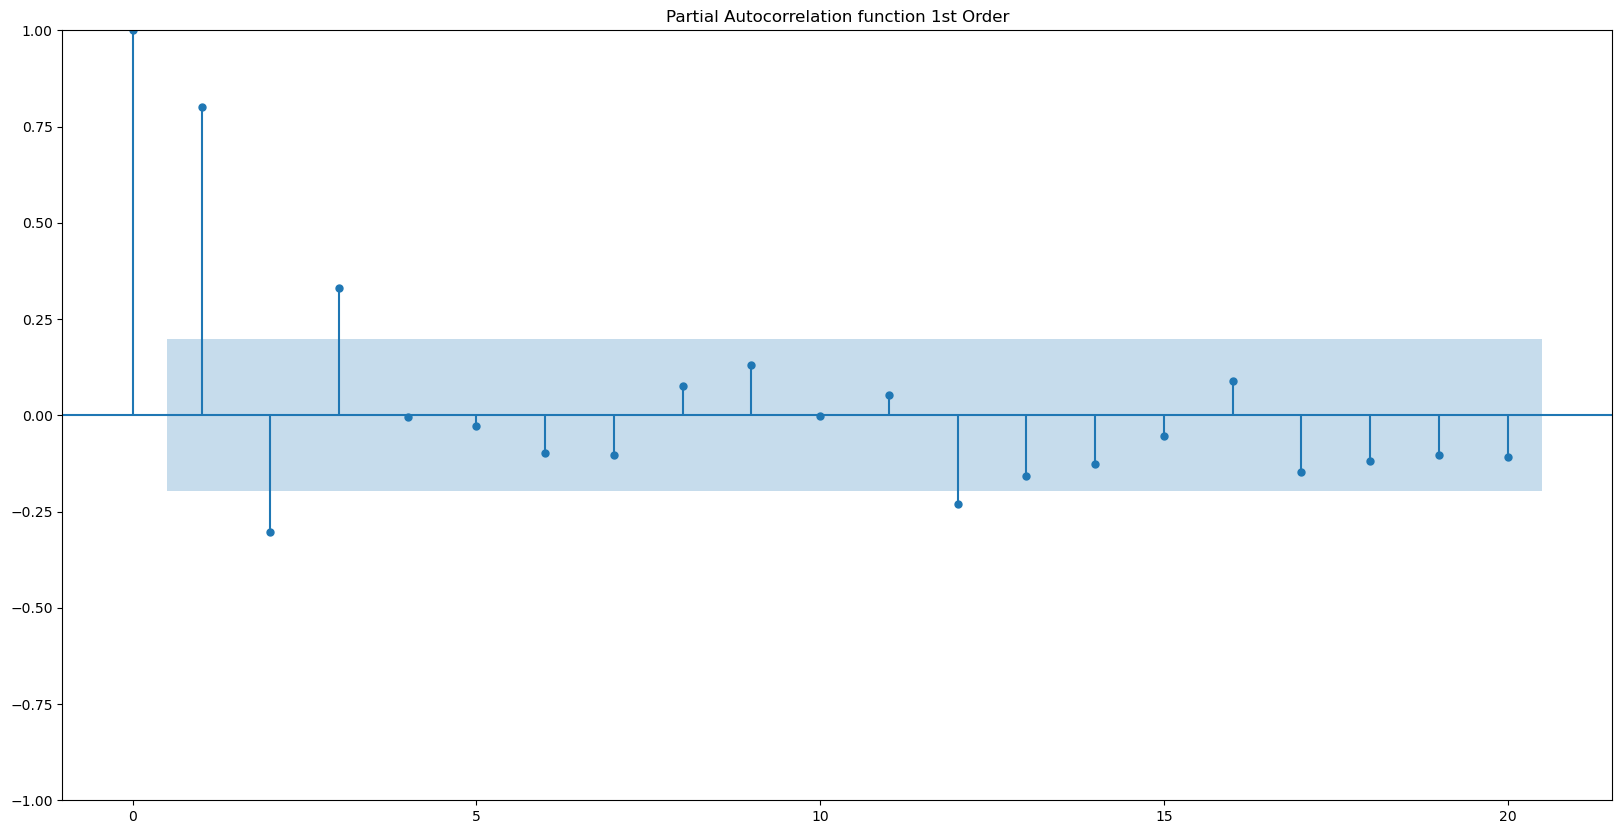

In [12]:
# statsmodels Time series Analysis plot: Partial Autocorrelation plot
from statsmodels.graphics.tsaplots import plot_pacf

plt.rc("figure", figsize=(20,10))
plot_pacf(df['df_first_order_diff'].dropna(), title='Partial Autocorrelation function 1st Order')
plt.show() 

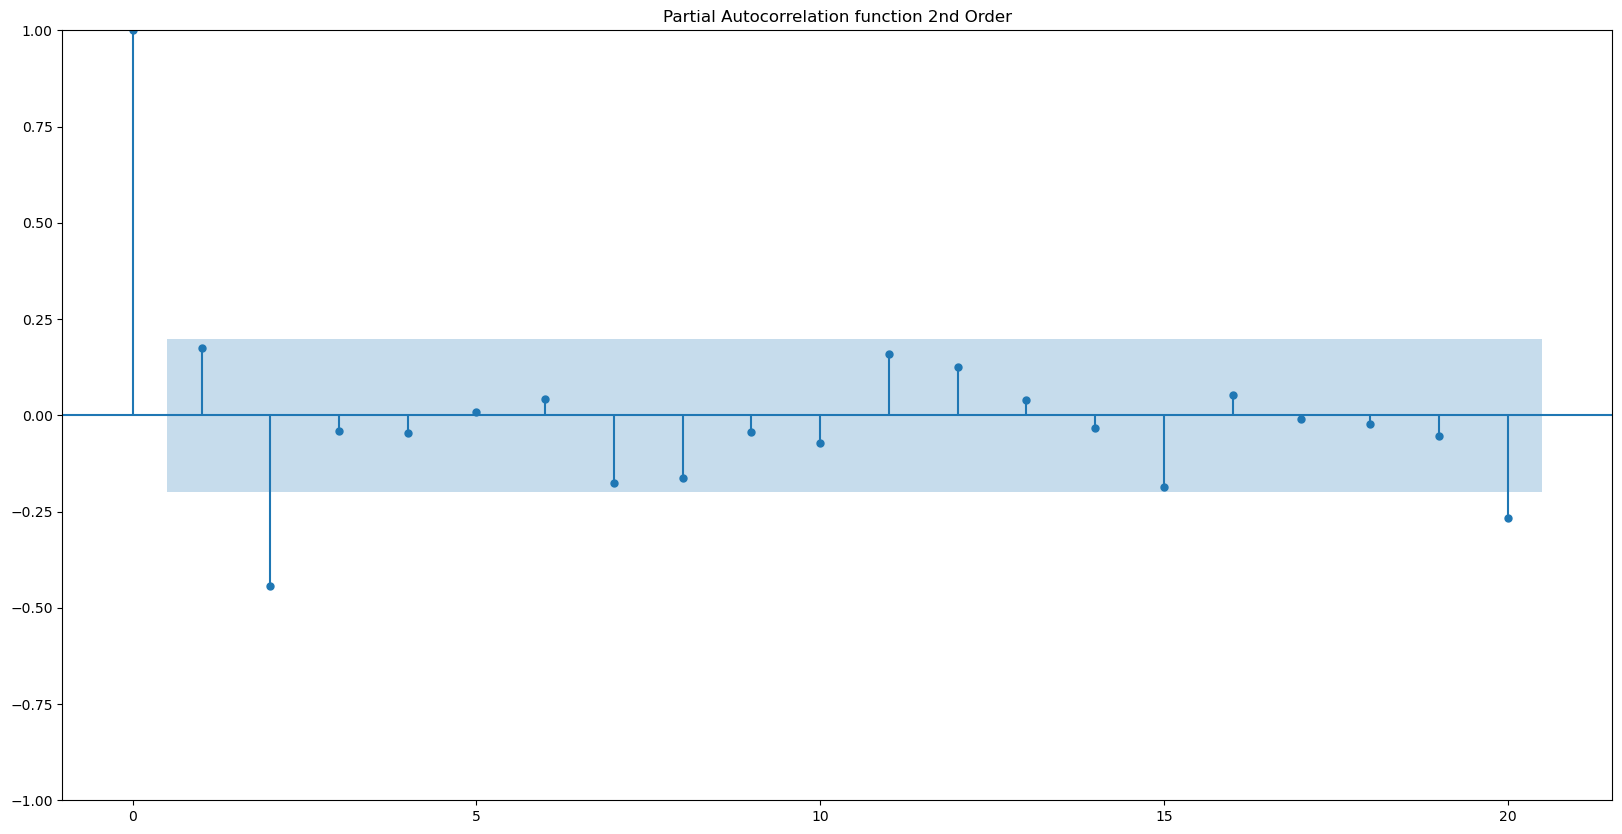

In [13]:
# statsmodels Time series Analysis plot: Partial Autocorrelation plot
from statsmodels.graphics.tsaplots import plot_pacf

plt.rc("figure", figsize=(20,10))
plot_pacf(df['df_second_order_diff'].dropna(), title='Partial Autocorrelation function 2nd Order')
plt.show() 

#### Observations (Autocorrealation and Partial Autocorrelation Plot)

- In both the plots, we see the 1st lag is the most significant. Thus, we consider “p” to be 1.
- Finally, “q” can be estimated similarly by looking at the ACF plot instead of the PACF plot. Looking at the number of lags crossing the threshold, we can determine how much of the past would be significant enough to consider for the future. The ones with high correlation contribute more and would be enough to predict future values. 

In [14]:
# import ARIMA

from statsmodels.tsa.arima.model import ARIMA
arima_model = ARIMA(df['WWWusage'], order=(1,1,3))
model = arima_model.fit()
print(model.summary())

C:\Users\Zikri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Zikri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Zikri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:               WWWusage   No. Observations:                  100
Model:                 ARIMA(1, 1, 3)   Log Likelihood                -252.289
Date:                Fri, 29 Mar 2024   AIC                            514.577
Time:                        00:02:58   BIC                            527.553
Sample:                             0   HQIC                           519.827
                                - 100                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8580      0.129      6.651      0.000       0.605       1.111
ma.L1          0.3429      0.174      1.971      0.049       0.002       0.684
ma.L2         -0.2852      0.197     -1.447      0.1

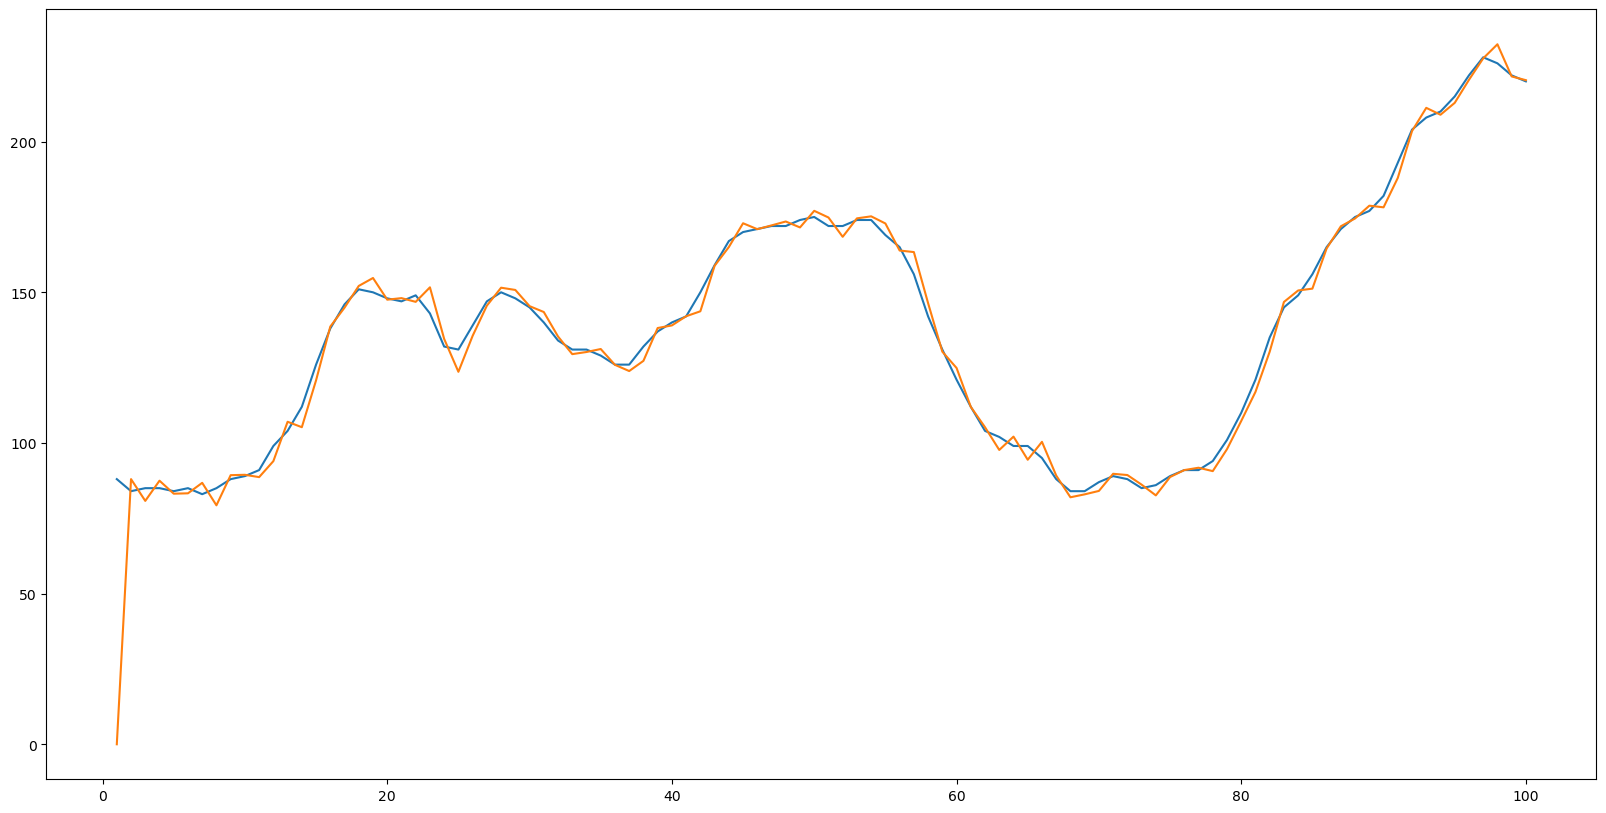

In [15]:
# plot prediction

prediction = model.predict()
plt.plot(df['WWWusage'])
plt.plot(prediction)

#### How to evaluate ARIMA

- Beyond visual analysis, we can use various error measures and metrics to evaluate the performance of our ARIMA model in Python. 

Let us consider the first 80 of 100 samples for fitting the model.

In [16]:
# import ARIMA

data = df['WWWusage']

from statsmodels.tsa.arima.model import ARIMA
arima_model = ARIMA(data[:80], order=(1,1,3))
model = arima_model.fit()
print(model.summary())

                               SARIMAX Results                                
Dep. Variable:               WWWusage   No. Observations:                   80
Model:                 ARIMA(1, 1, 3)   Log Likelihood                -202.179
Date:                Fri, 29 Mar 2024   AIC                            414.358
Time:                        00:02:58   BIC                            426.205
Sample:                             0   HQIC                           419.104
                                 - 80                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7908      0.242      3.262      0.001       0.316       1.266
ma.L1          0.3586      0.278      1.290      0.197      -0.186       0.904
ma.L2         -0.2077      0.321     -0.646      0.5

C:\Users\Zikri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Zikri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Zikri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


#### About prediciton

(1) If you see the original plot of the complete data, there is a considerable rise in the values over the last 30 samples or so. Since we have truncated 20 samples, the model has a tough task of predicting the exponential rise in its test set.\
(2)  From the values seen in the model summary above, you can observe that the model does not perform as well with 80 samples as 100.

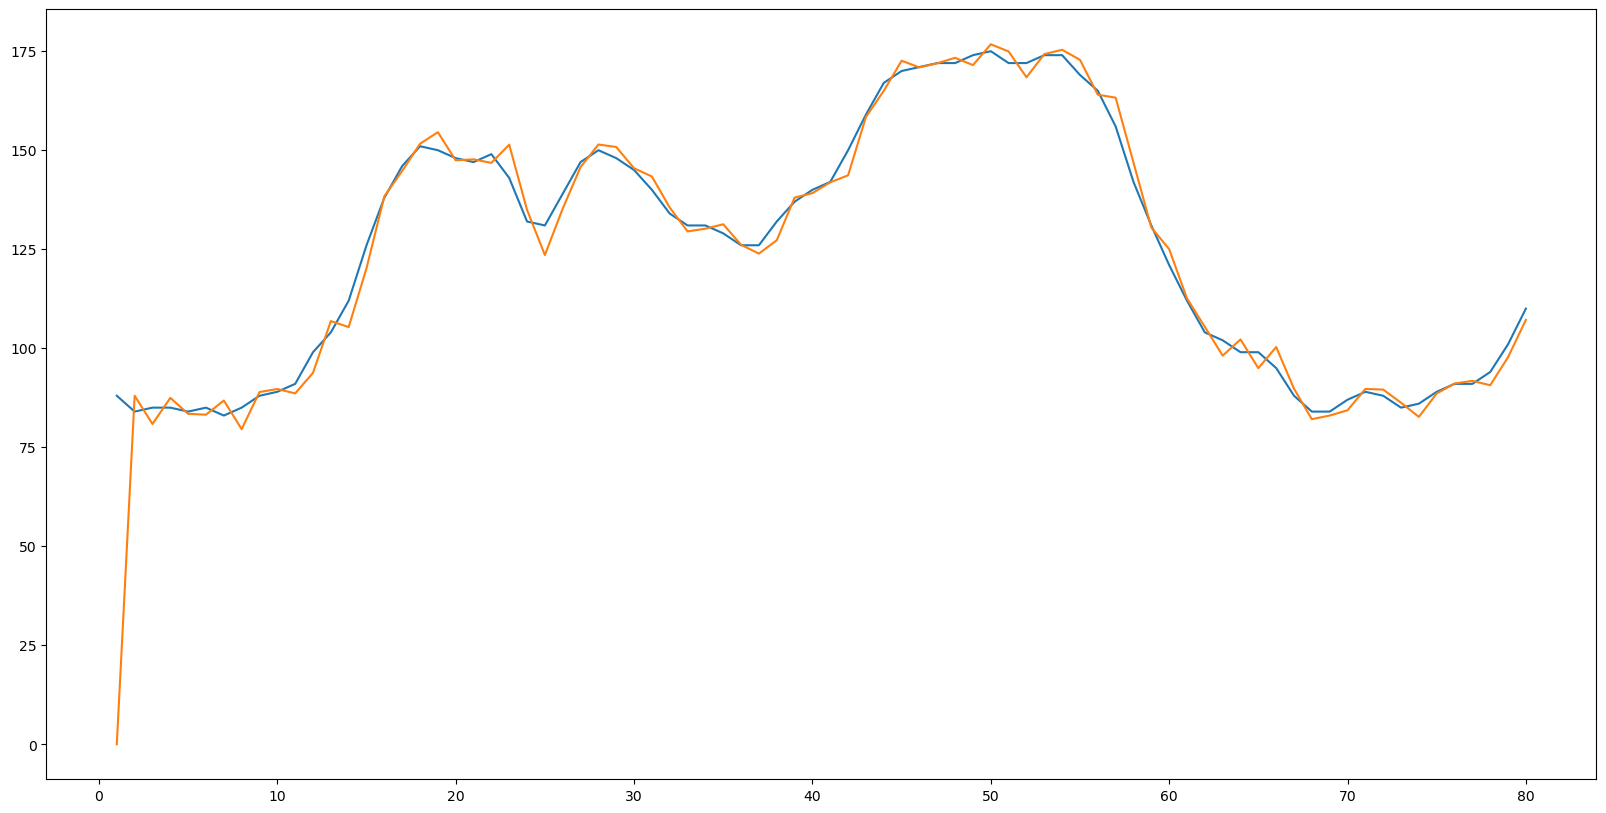

In [17]:
# forecast that the model fits for the 80 samples.

prediction = model.predict()
plt.plot(data[:80])
plt.plot(prediction)

#### Observations

As expected from the model summary, the forecast fits more loosely than the original model. Nevertheless, for testing, we move ahead with inference

The trained Python ARIMA forecast model has a method called forecast which will compute n predicted samples given the value of n. Since our test set is of size 20, we predict 20 instances that occur right after the last timestamp of the training set.

In [18]:
model.forecast(20)

C:\Users\Zikri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


80    116.756152
81    120.827897
82    123.453257
83    125.529395
84    127.171207
85    128.469555
86    129.496289
87    130.308232
88    130.950318
89    131.458080
90    131.859619
91    132.177157
92    132.428266
93    132.626843
94    132.783878
95    132.908062
96    133.006266
97    133.083927
98    133.145341
99    133.193907
Name: predicted_mean, dtype: float64

In [19]:
# make prediction using ARIMA (model.forecast(n))

y_pred = pd.Series(model.forecast(20), index = df.index[80:])
y_true = data[80:]

C:\Users\Zikri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


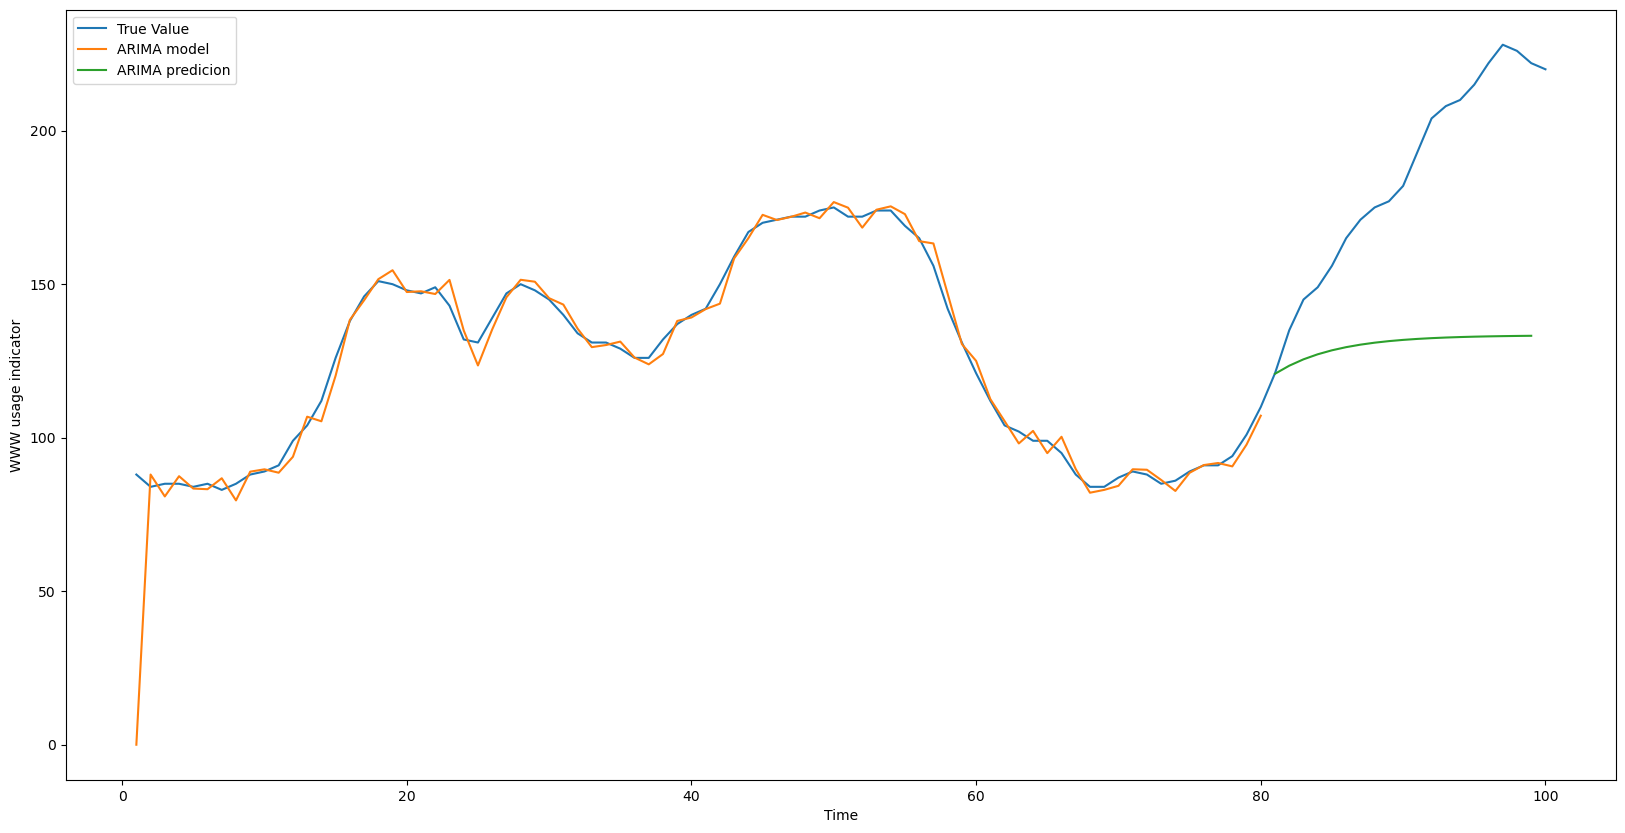

In [20]:
# plot prediction and real value

# forecast that the model fits for the 80 samples.

prediction = model.predict()
plt.plot(data, label = 'True Value')
plt.plot(prediction, label = "ARIMA model")
plt.plot(y_pred, label = "ARIMA predicion")
plt.xlabel('Time')
plt.ylabel('WWW usage indicator')
plt.legend()